# Blood Glucose Control - EDA

**Name:** Julia



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [28]:
import pandas as pd

df1 = pd.read_csv('../data/gluroo_500030.csv')
df2 = pd.read_csv('../data/gluroo_679372.csv')

# add a column storing the patient's id to distinguish between patients
df1['patient_id'] = 500030
df2['patient_id'] = 679372

df = pd.concat([df1, df2])

df.head(10)


,date,sender_id,bgl,bgl_date_millis,text,template,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index,dose_automatic,fp_bgl,message_basal_change,__typename,trend,patient_id
0,2024-05-01 00:00:27.029000-05:00,NaN,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
1,2024-05-01 00:05:27.183000-05:00,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
2,2024-05-01 00:10:26.949000-05:00,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
3,2024-05-01 00:15:27.180000-05:00,NaN,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
4,2024-05-01 00:20:27.021000-05:00,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
5,2024-05-01 00:25:27.441000-05:00,NaN,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
6,2024-05-01 00:30:27.608000-05:00,NaN,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
7,2024-05-01 00:35:26.812000-05:00,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
8,2024-05-01 00:40:26.669000-05:00,NaN,134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
9,2024-05-01 00:45:26.744000-05:00,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030


### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 

To get an idea of what kind of patterns may exist in a PWD's blood glucose levels throughout a day I want to start by plotting a time series plot showing blood glucose levels over time. 

This function takes a number n and a patient_id, and plots the patient's bgl for n random days.

/var/folders/dz/p8wzfj6n7hxfbfrdd01g3ptm0000gn/T/ipykernel_77349/4168398765.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
/var/folders/dz/p8wzfj6n7hxfbfrdd01g3ptm0000gn/T/ipykernel_77349/4168398765.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date_only'] = data['date'].dt.date
/var/folders/dz/p8wzfj6n7hxfbfrdd01g3ptm0000gn/T/ipykernel_77349/4168398765.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

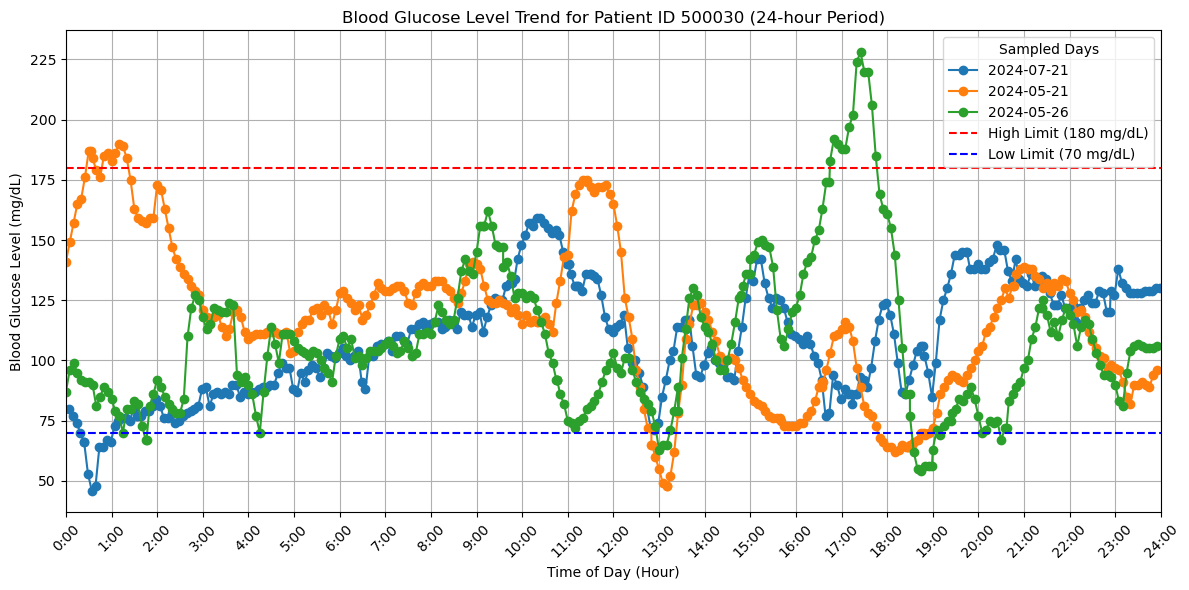

In [74]:
import matplotlib.pyplot as plt

def plot_bgl_trend(df, n, patient_id):

    data = df[df['patient_id'] == patient_id]
    
    data['date'] = pd.to_datetime(data['date'])
    data['date_only'] = data['date'].dt.date
    unique_days = data['date_only'].unique()
    
    sampled_days = np.random.choice(unique_days, n, replace=False)
    filtered_data = data[data['date_only'].isin(sampled_days)]
    filtered_data['time'] = filtered_data['date'].dt.hour + filtered_data['date'].dt.minute / 60  #hours
    
    plt.figure(figsize=(12, 6))
    
    for day in sampled_days:
        day_data = filtered_data[filtered_data['date_only'] == day]
        plt.plot(day_data['time'], day_data['bgl'], marker='o', label=str(day))
    
    plt.axhline(y=180, color='red', linestyle='--', label='High Limit (180 mg/dL)')
    plt.axhline(y=70, color='blue', linestyle='--', label='Low Limit (70 mg/dL)')
    
    plt.title(f'Blood Glucose Level Trend for Patient ID {patient_id} (24-hour Period)')
    plt.xlabel('Time of Day (Hour)')
    plt.ylabel('Blood Glucose Level (mg/dL)')
    plt.xticks(ticks=np.arange(0, 25, 1), labels=[f'{i}:00' for i in range(24)] + ['24:00'], rotation=45)
    plt.xlim(0, 24)
    plt.legend(title="Sampled Days")
    plt.grid()
    plt.tight_layout()
    plt.show()


plot_bgl_trend(df, 3, 500030)


From the graph we can observe that there seems to be very different trends for the three sampled days. A general trend is that blood glucose is rising in the at night and in the morning, up until anywhere from 7:00 - 12:00. All three days experienced a dip in the afternoon and rising bgls in the evening.

On 2024-05-11 there seems to be much more fluctuation in this patient's blood glucose levels than in the other 2, especially in the afternoon and evening from 13:00 onwards. This makes me wonder if we can visualize the fluctuation in bgls. We can plot a histogram to examine the distribution of the fluctuations.  

/var/folders/dz/p8wzfj6n7hxfbfrdd01g3ptm0000gn/T/ipykernel_77349/1429885366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_data['date'] = pd.to_datetime(patient_data['date'])


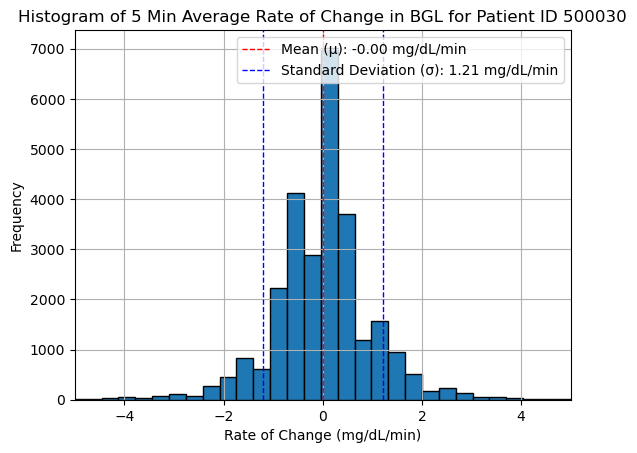

In [75]:
def plot_bgl_rate_of_change(df, patient_id):
   
    data = df[df['patient_id'] == patient_id]
    data['date'] = pd.to_datetime(data['date'])
    data = data.sort_values(by='date') # make sure that measurements are consecutive
    
    data['bgl_diff'] = data['bgl'].diff()  
    data['rate_of_change'] = data['bgl_diff'] / 5


    rate_of_change_data = data.dropna(subset=['rate_of_change'])

    plt.hist(rate_of_change_data['rate_of_change'], bins=150, edgecolor='black')  
    mu = rate_of_change_data['rate_of_change'].mean()
    sigma = rate_of_change_data['rate_of_change'].std()

    plt.axvline(mu, color='red', linestyle='dashed', linewidth=1, label=f'Mean (μ): {mu:.2f} mg/dL/min')
    plt.axvline(mu + sigma, color='blue', linestyle='dashed', linewidth=1, label=f'Standard Deviation (σ): {sigma:.2f} mg/dL/min')
    plt.axvline(mu - sigma, color='blue', linestyle='dashed', linewidth=1)
    plt.title(f'Histogram of 5 Min Average Rate of Change in BGL for Patient ID {patient_id}')
    plt.xlabel('Rate of Change (mg/dL/min)')
    plt.ylabel('Frequency')
    plt.xlim(-5, 5)  
    plt.legend()
    plt.grid()
    plt.show()

plot_bgl_rate_of_change(df, 500030)

This graph shows that the standard deviation of the fluctuation in bgl of this patient is around 1.21 mg/dL/min. This may be useful for comparing different control methods or treatments, where a lower sigma indicates more stable blood glucose levels, while a higher sigma is the opposite. 

I want to find a way to visualize the variability of a PWD's bgl within a day. A box plot could show the range and spread of the data but it might be hard to compare with other days when there are too many plots. Instead, I want to plot a scatter plot that shows the maximum and minimum bgl of each day which could more clearly show trend and how well a day "scores."

/var/folders/dz/p8wzfj6n7hxfbfrdd01g3ptm0000gn/T/ipykernel_77349/2261639528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
/var/folders/dz/p8wzfj6n7hxfbfrdd01g3ptm0000gn/T/ipykernel_77349/2261639528.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date_only'] = data['date'].dt.date


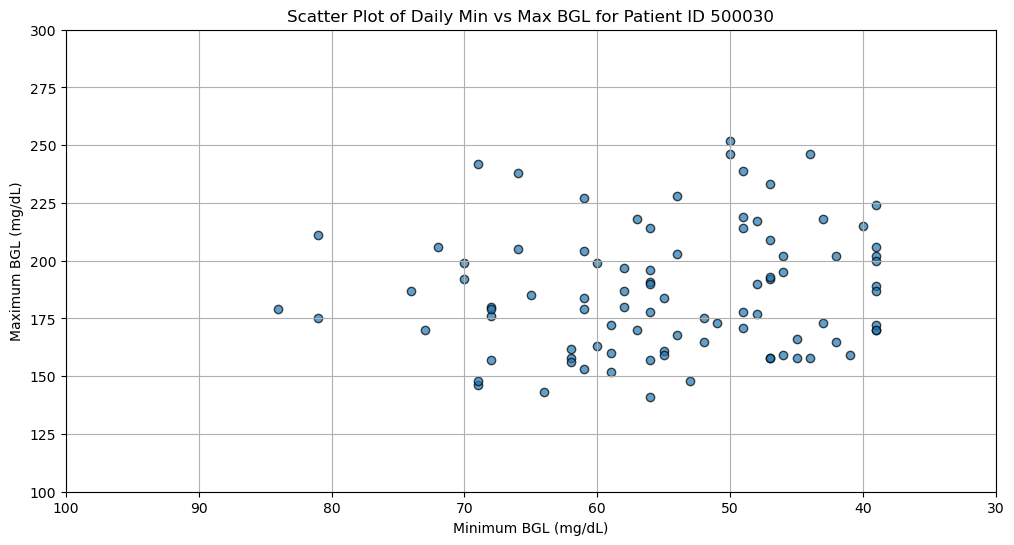

/var/folders/dz/p8wzfj6n7hxfbfrdd01g3ptm0000gn/T/ipykernel_77349/2261639528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
/var/folders/dz/p8wzfj6n7hxfbfrdd01g3ptm0000gn/T/ipykernel_77349/2261639528.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date_only'] = data['date'].dt.date


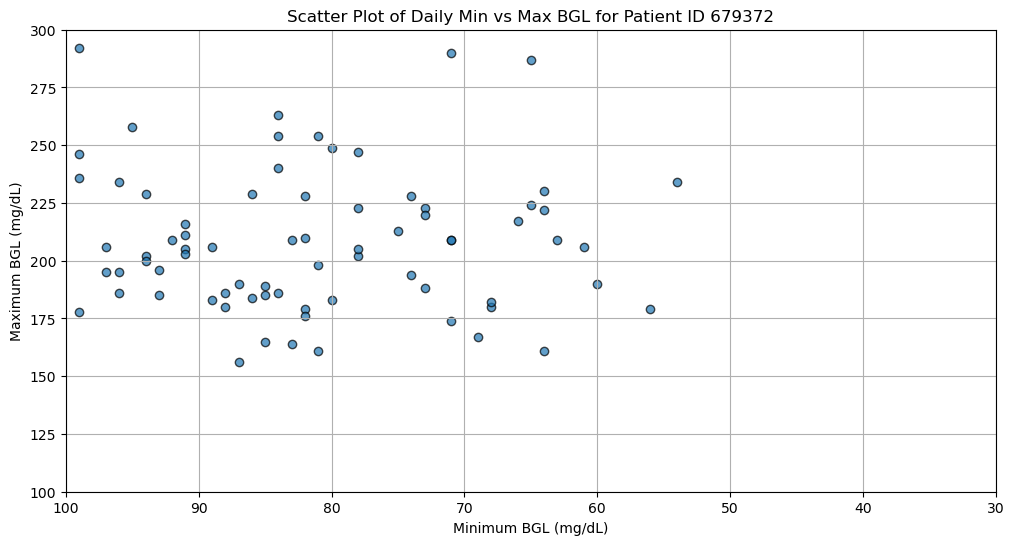

In [90]:
def plot_bgl_variability(df, patient_id):

    data = df[df['patient_id'] == patient_id]
    data['date'] = pd.to_datetime(data['date'])

    data['date_only'] = data['date'].dt.date
    daily_stats = data.groupby('date_only')['bgl'].agg(min_bgl='min', max_bgl='max').reset_index()

    plt.figure(figsize=(12, 6))
    plt.scatter(daily_stats['min_bgl'], daily_stats['max_bgl'], alpha=0.7, edgecolor='black')
    plt.xlim(100, 30) # min bgl decreasing 100 - 30
    plt.ylim(100, 300) # max bgl increasing from 100 - 300
    plt.title(f'Scatter Plot of Daily Min vs Max BGL for Patient ID {patient_id}')
    plt.xlabel('Minimum BGL (mg/dL)')
    plt.ylabel('Maximum BGL (mg/dL)')
    plt.grid()
    plt.show()

plot_bgl_variability(df, 500030)
plot_bgl_variability(df, 679372)

A point closer to the (100, 100) corner indicates a day with less variability (small range of bgls) while a point in the upper right corner indicates a large range. We can see that the first patient experiences more low bgls while the second patient experiences more high bgls and less low bgls.

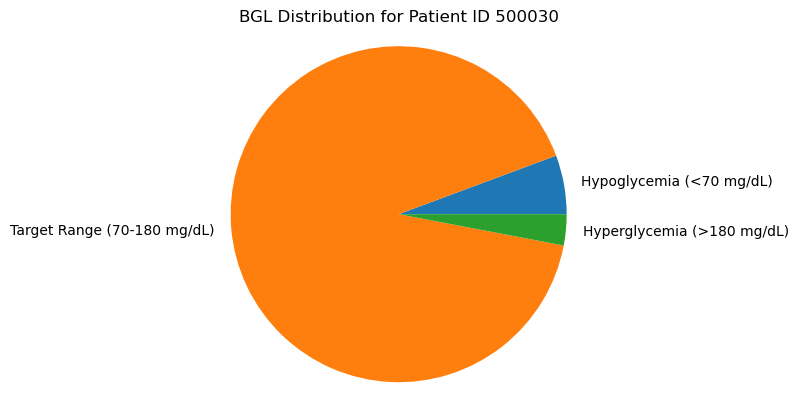

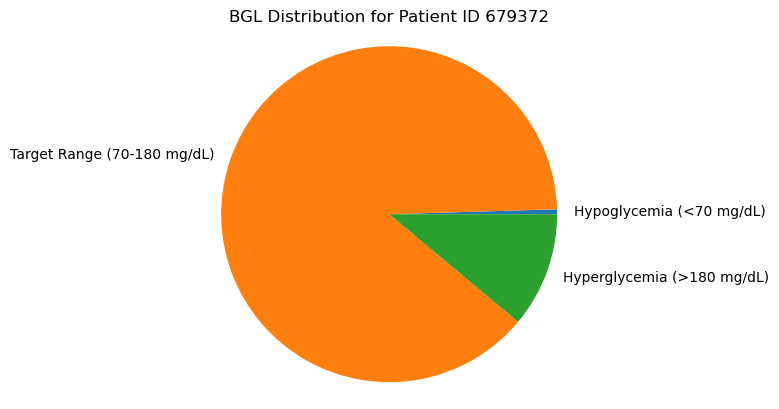

In [98]:
def plot_bgl_distribution(df, patient_id):
    patient_data = df[df['patient_id'] == patient_id]

    hypoglycemia = len(patient_data[patient_data['bgl'] < 70])
    target_range = len(patient_data[(patient_data['bgl'] >= 70) & (patient_data['bgl'] <= 180)])
    hyperglycemia = len(patient_data[patient_data['bgl'] > 180])

    categories = ['Hypoglycemia (<70 mg/dL)', 'Target Range (70-180 mg/dL)', 'Hyperglycemia (>180 mg/dL)']
    values = [hypoglycemia, target_range, hyperglycemia]
    plt.pie(values, labels=categories)
    plt.title(f'BGL Distribution for Patient ID {patient_id}')
    plt.axis('equal')  
    plt.show()

plot_bgl_distribution(df, 500030)
plot_bgl_distribution(df, 679372)


These distributions also confirm our observations from the previous plots. Where patient 1 experiences more frequent hypoglycemia while patient 2 experiences more frequent hyperglycemia. 

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. What are some of the biggest pain points of PWD when it comes to managing T1D? What are some barriers that you face in daily life?
2. Kind of following up on that, what are some of the things that a PWD have to put extra consideration into that non-diabetics usually don't consider. For example, I saw the file with the glycemic index data. Is this something you have to check everytime before eating? How percise do the measurements have to be?
3. What are the most important factors that affect blood glucose levels? Are these things approximatley consistent across individuals or very person dependent? Is there any specific factor that you think plays the biggest role?

Super excited to have the opportunity to work on this team! 

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`